In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('/content/Wholesale customers data.csv')

In [12]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [13]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

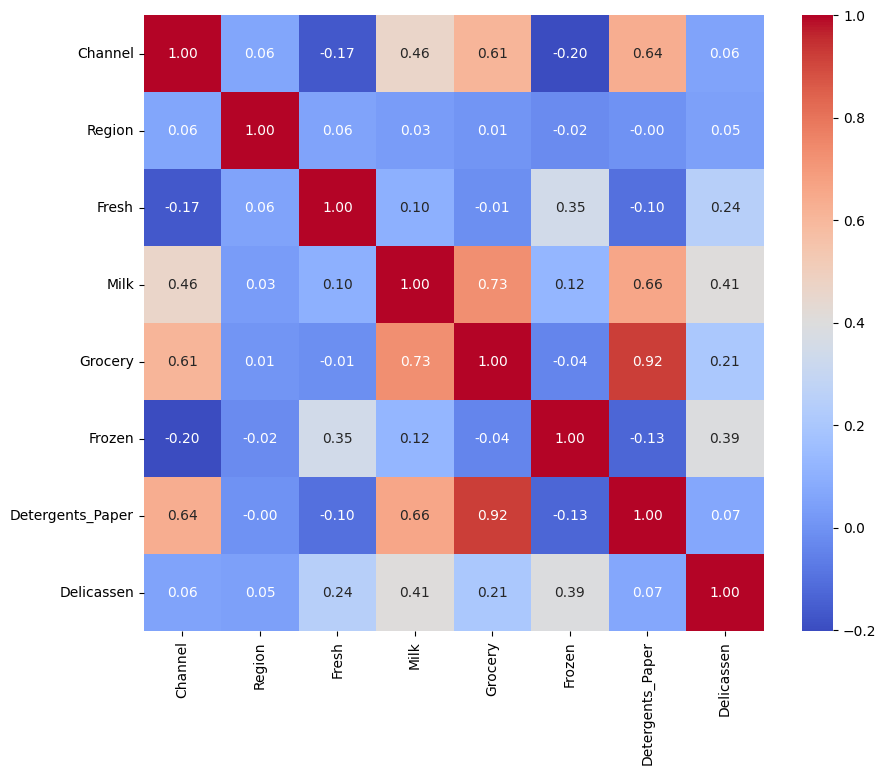

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

<Axes: >

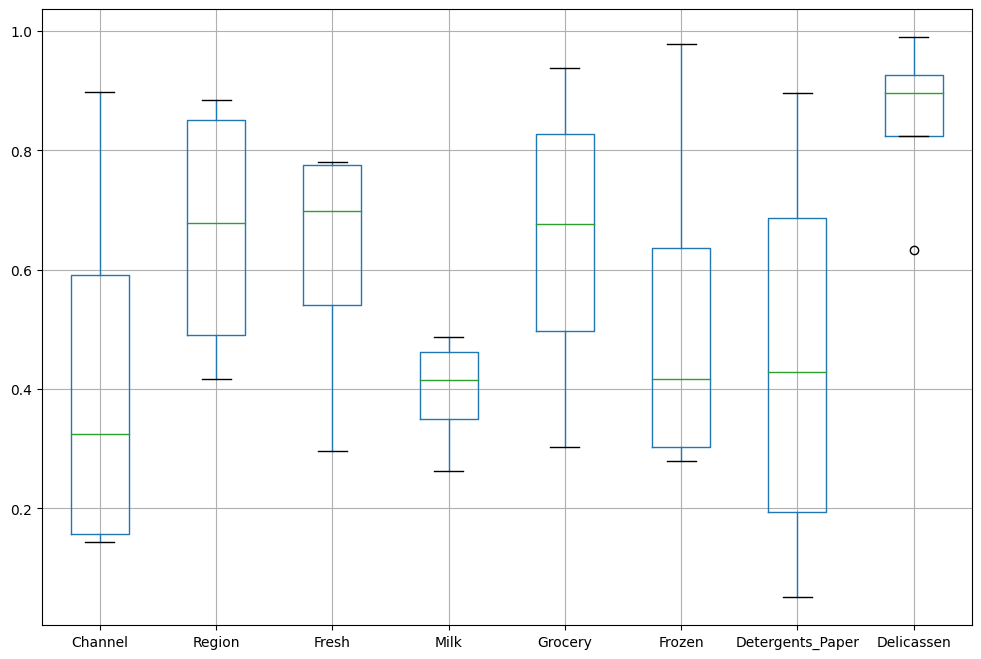

In [14]:
pt = pd.DataFrame(data = np.random.random(size=(4,8)), columns = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'])
plt.figure(figsize =(12, 8))
pt.boxplot()


In [ ]:
#Clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
x=df[['Fresh', 'Frozen']]

In [19]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_#will calculate with in cluster sum of squares
  wcss.append(css)

In [20]:
wcss

[80566500677.95229,
 37423009544.38754,
 23703529548.424316,
 18294803353.892685,
 14060585509.15035,
 10443447231.50078,
 8724342544.717072,
 7279232854.274537,
 6048596964.089946,
 5385069093.389611]

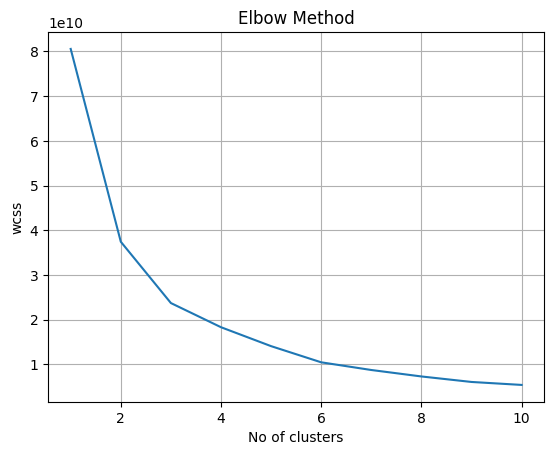

In [21]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [22]:
km=KMeans(n_clusters=3,n_init=10)
km.fit(x)

KMeans(n_clusters=3, n_init=10)

In [23]:
cluster_labels=km.predict(x)

In [24]:
cluster_labels

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2,
       0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

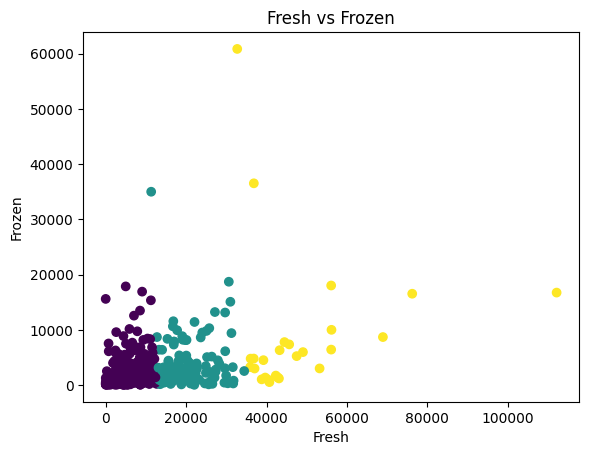

In [27]:
plt.scatter(x['Fresh'],x['Frozen'],c=cluster_labels)
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh vs Frozen')
plt.show()

In [28]:
df['Cluster_Labels']=cluster_labels

In [29]:
cluster_indices=np.where(cluster_labels==0)[0]

In [30]:
cluster_indices

array([  0,   1,   2,   5,   6,   7,   8,   9,  10,  15,  16,  17,  19,
        21,  26,  28,  31,  34,  35,  38,  42,  43,  44,  45,  46,  48,
        49,  50,  51,  53,  55,  56,  57,  59,  60,  62,  63,  64,  65,
        66,  68,  69,  72,  74,  76,  77,  78,  79,  80,  81,  82,  84,
        88,  90,  92,  94,  95,  96,  97,  98,  99, 100, 101, 102, 106,
       107, 108, 109, 110, 111, 115, 116, 117, 119, 121, 122, 123, 128,
       130, 131, 133, 134, 135, 136, 137, 139, 143, 146, 147, 148, 151,
       153, 154, 155, 156, 158, 159, 160, 161, 163, 164, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 182, 184,
       185, 186, 187, 188, 189, 192, 193, 194, 197, 198, 199, 200, 201,
       203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216,
       218, 219, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 233,
       235, 236, 238, 243, 244, 245, 246, 249, 250, 251, 252, 254, 256,
       257, 260, 261, 263, 264, 265, 266, 268, 270, 271, 272, 27

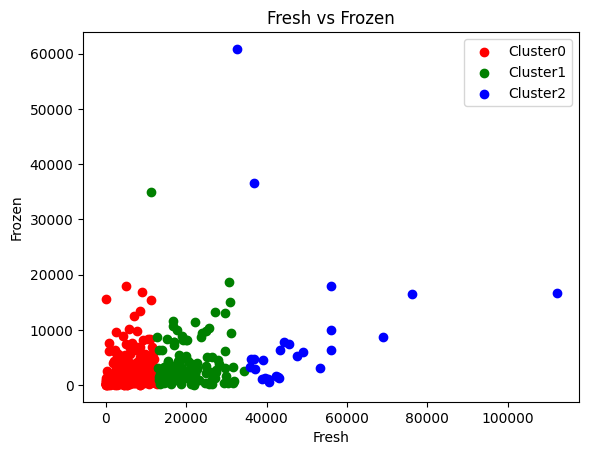

In [31]:
colors=['r','g','b']
for i in range(max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Fresh'],cluster_data['Frozen'],c=colors[i],label=f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel("Frozen")
plt.title('Fresh vs Frozen')
plt.legend()
plt.show()

In [37]:
inertia=km.inertia_
print("Inertia = ",inertia)

Inertia =  23703529548.424316


In [40]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(sil_avg)

0.5534156754525194


In [41]:
#prediction
def predict_cluster(Region,Frozen):
  new_data=[[Fresh,Frozen]]
  cluster=km.predict(new_data)
  return cluster[0]

In [42]:
#new data
Fresh=30000
Frozen=45000
c=predict_cluster(Region,Frozen)
print(f'Cluster :{c}')

Cluster :2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [43]:
#AGGLOMERATIVE HIERARCHICHAL CLUSTERING

In [44]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [45]:
mergings=linkage(x,method='ward')

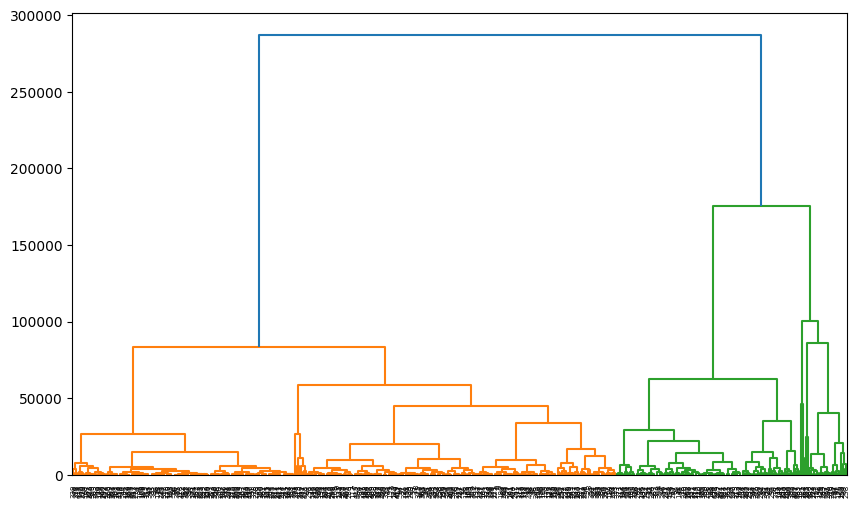

In [46]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [47]:
cluster_labels=fcluster(mergings,200000,criterion='distance')

In [48]:
cluster_labels

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,

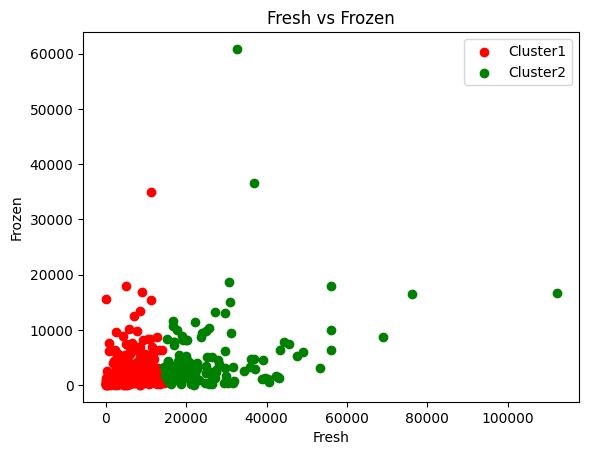

In [49]:
colors=['r','g']
for i in range(1,max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Fresh'],cluster_data['Frozen'],c=colors[i-1],label=f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel("Frozen")
plt.title('Fresh vs Frozen')
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(sil_avg)

0.5732982218662069
